# IMDB Rating Prediction with Linear Regression

The source code is an implementation for IMDB Rating prediction linear regression from scratch with python programming language. Implementation is included some preprocessing step as well.  

### Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub:
https://github.com/MohsenEbadpour

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
import seaborn as sn
import math

data = pd.read_excel("./CSM_dataset.xlsx")

print("List of Missed Values",data.isna().sum(),sep='\n')   


List of Missed Values
Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64


In [2]:
# تابعی برای پر کردن مقادیر گم شده با مقدار میانگین
def FillMissedVlues() :
    nans = data.isna().sum()
    for count,index in zip(nans,range(len(nans))) :
        if count == 0 :
            continue
        # محاسبه میانگین    
        avg = (data.iloc[:,index].sum())/(len(data)-count)
        data.iloc[:,index] = data.iloc[:,index].fillna(int(avg))
        
FillMissedVlues()
print("List of Missed Values",data.isna().sum(),sep='\n')  

List of Missed Values
Movie                  0
Year                   0
Ratings                0
Genre                  0
Gross                  0
Budget                 0
Screens                0
Sequel                 0
Sentiment              0
Views                  0
Likes                  0
Dislikes               0
Comments               0
Aggregate Followers    0
dtype: int64


In [3]:
features_to_normal = ("Gross","Budget","Screens","Views","Likes","Dislikes","Comments","Aggregate Followers")
other_features_to_normal = ("Year","Ratings","Genre","Sequel","Sentiment")
all_features = ("Year","Ratings","Genre","Gross","Budget","Screens","Sequel","Sentiment","Views","Likes","Dislikes","Comments","Aggregate Followers")


def MeanNormal(x,x_min,x_max,x_mean):
    return (x - x_mean)/(x_max-x_min)

def NormalizeScale(Features):
    for feature in Features :
        avg = data[feature].sum()/len(data)
        data[feature] = data[feature].apply(lambda x: MeanNormal(x,data[feature].min(),data[feature].max(),avg))
        
NormalizeScale(features_to_normal)        
NormalizeScale(other_features_to_normal)  
    

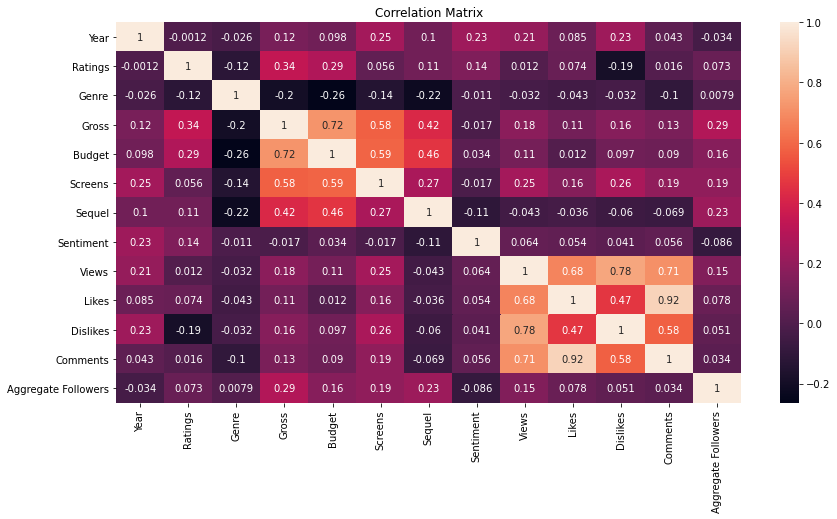

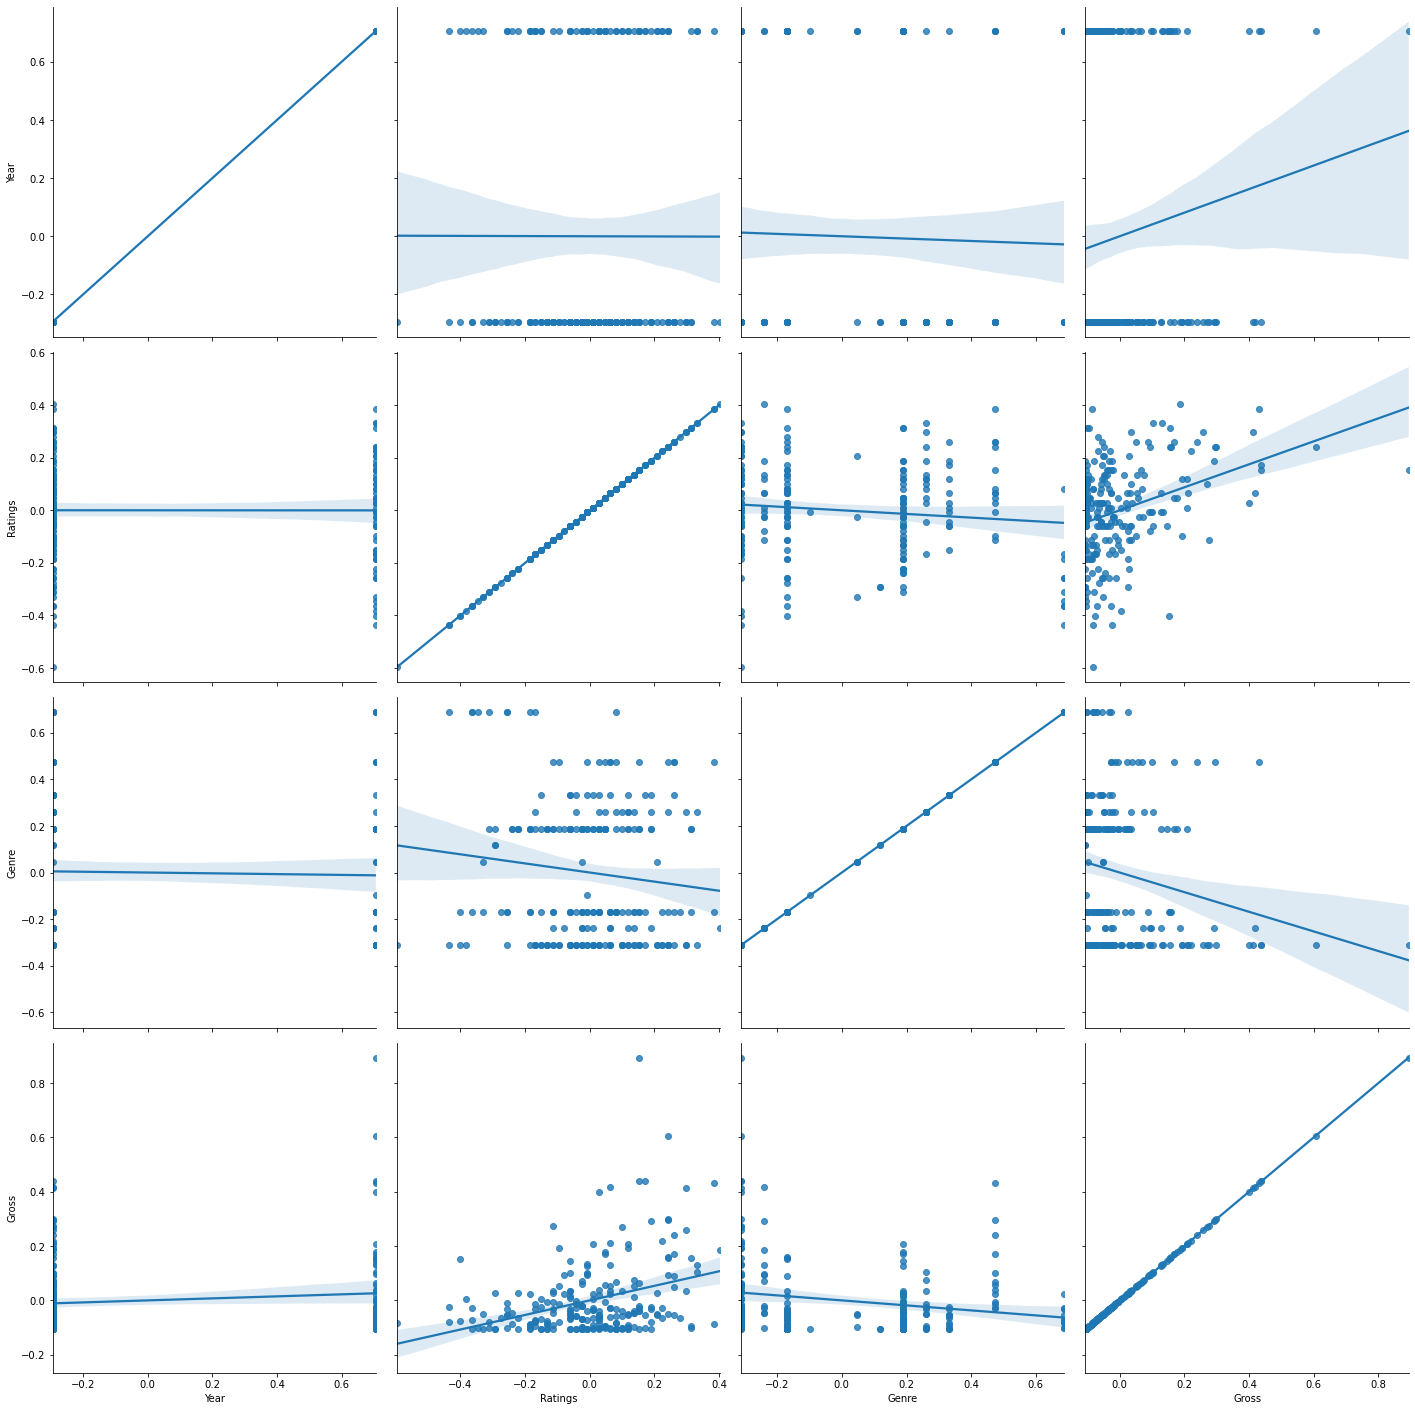

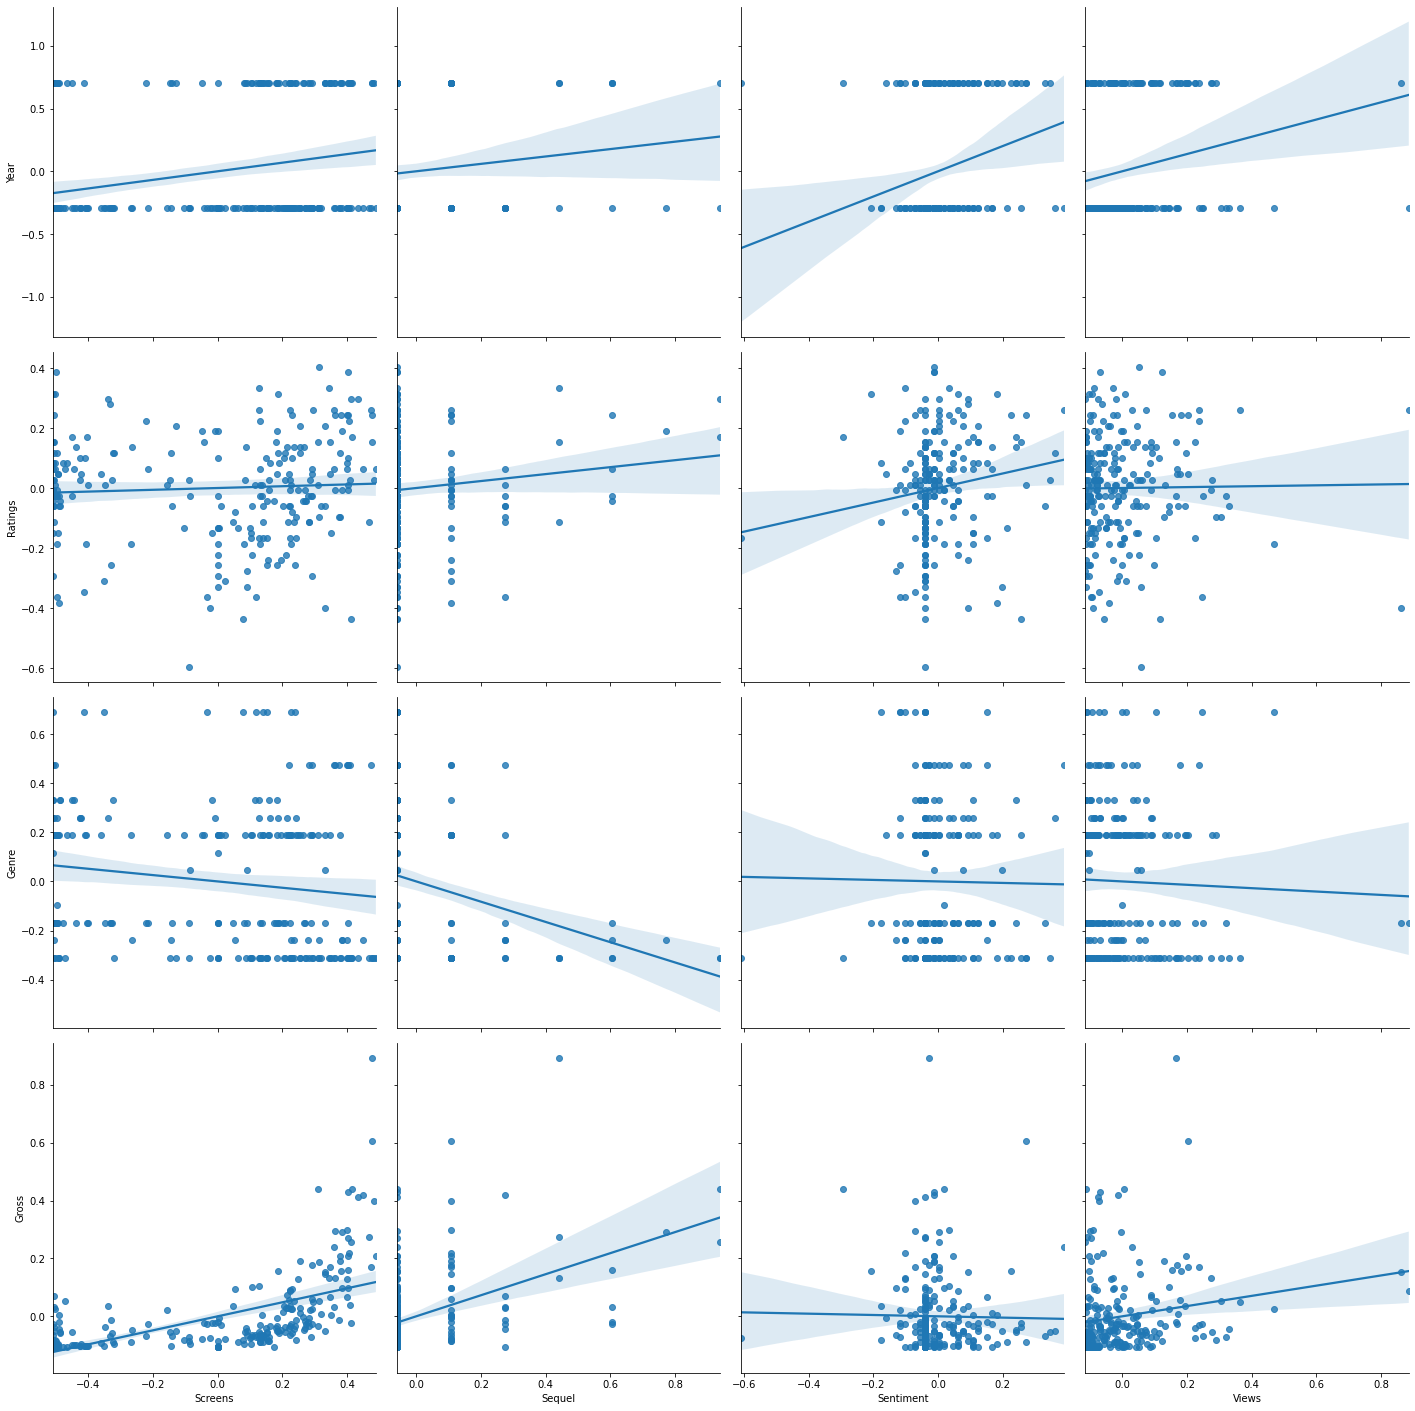

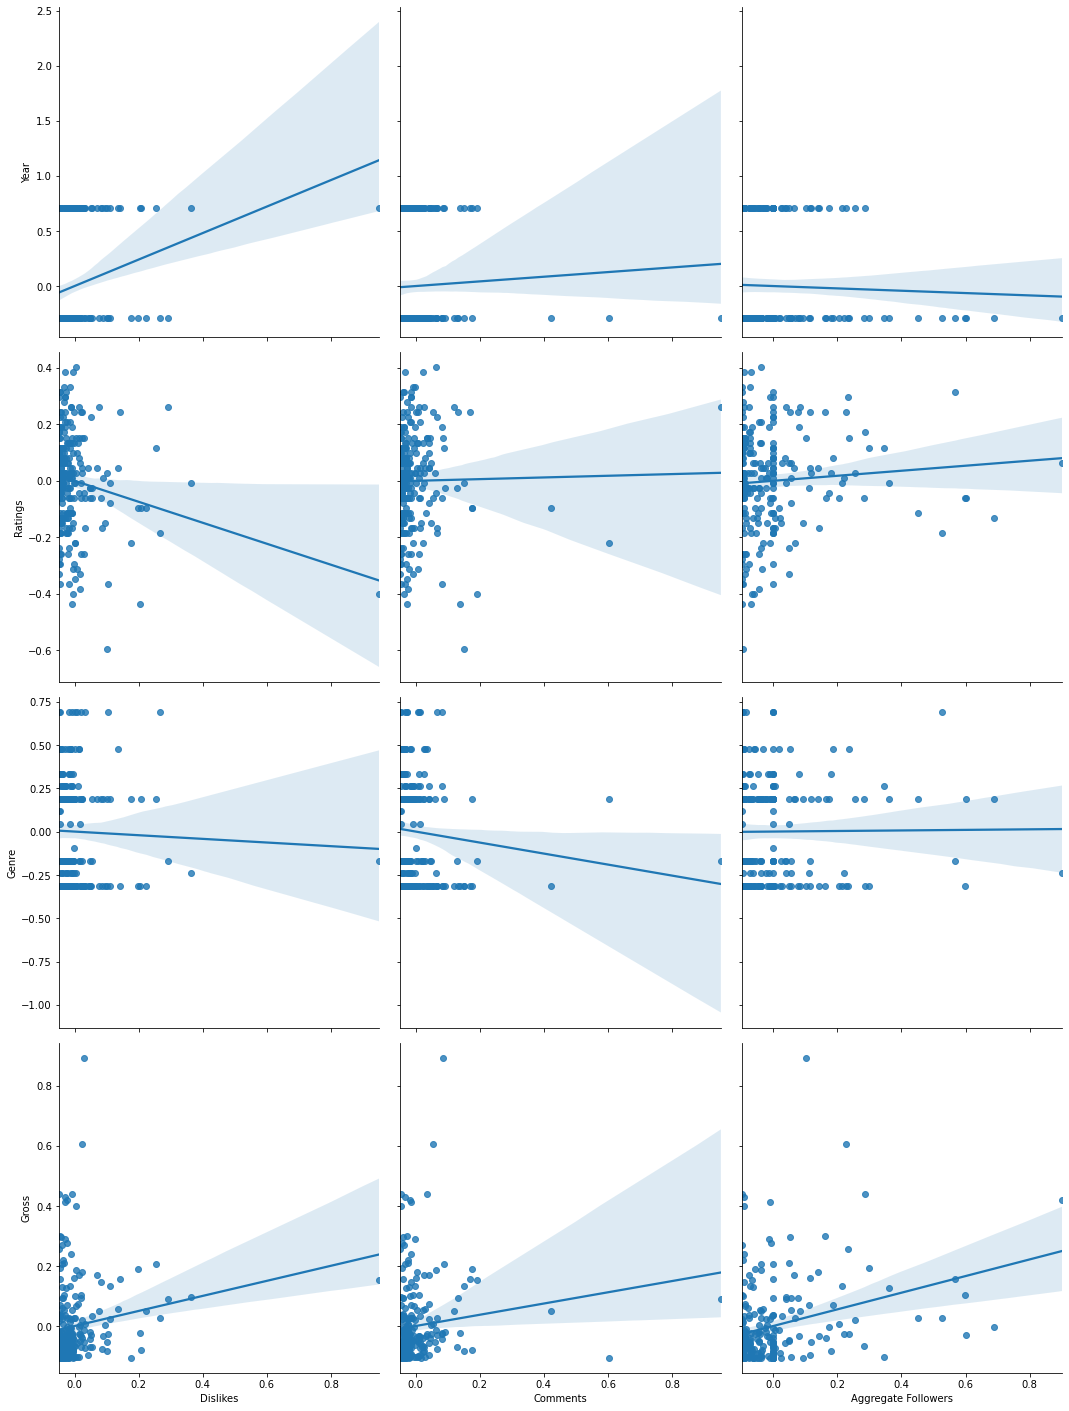

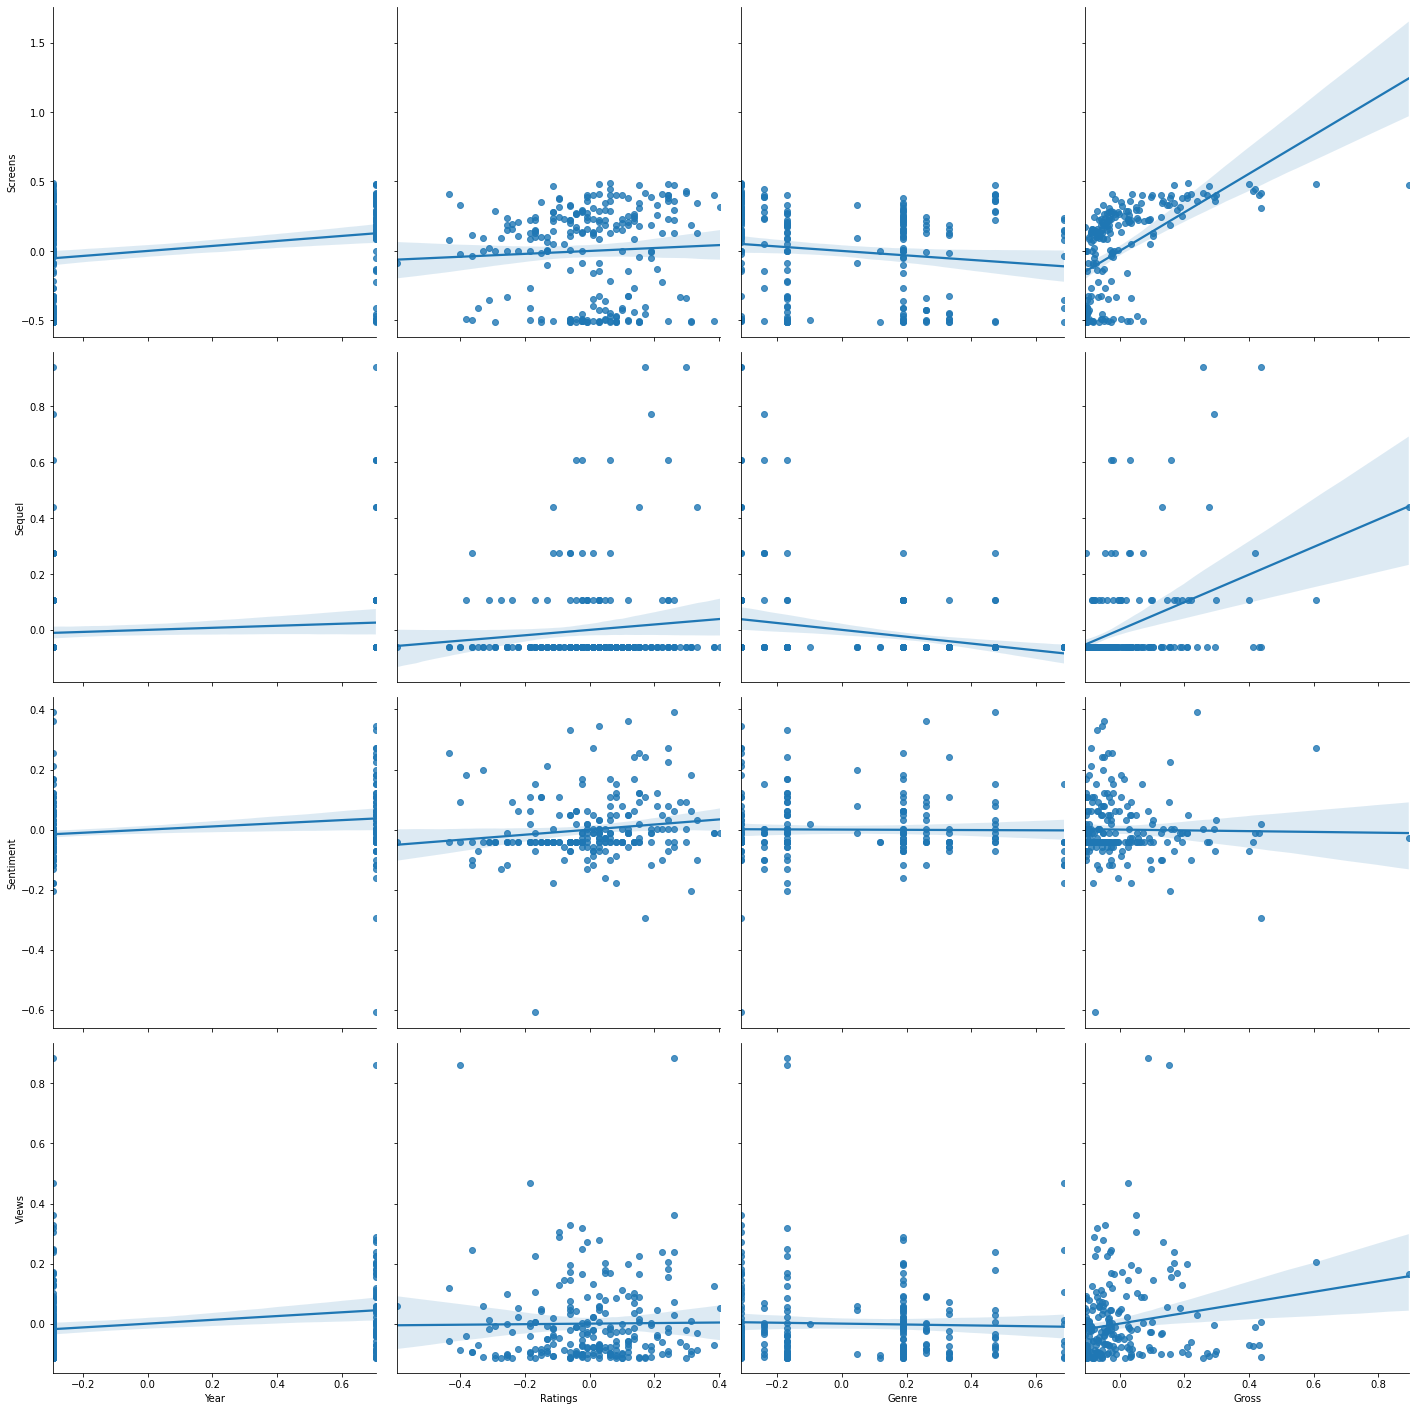

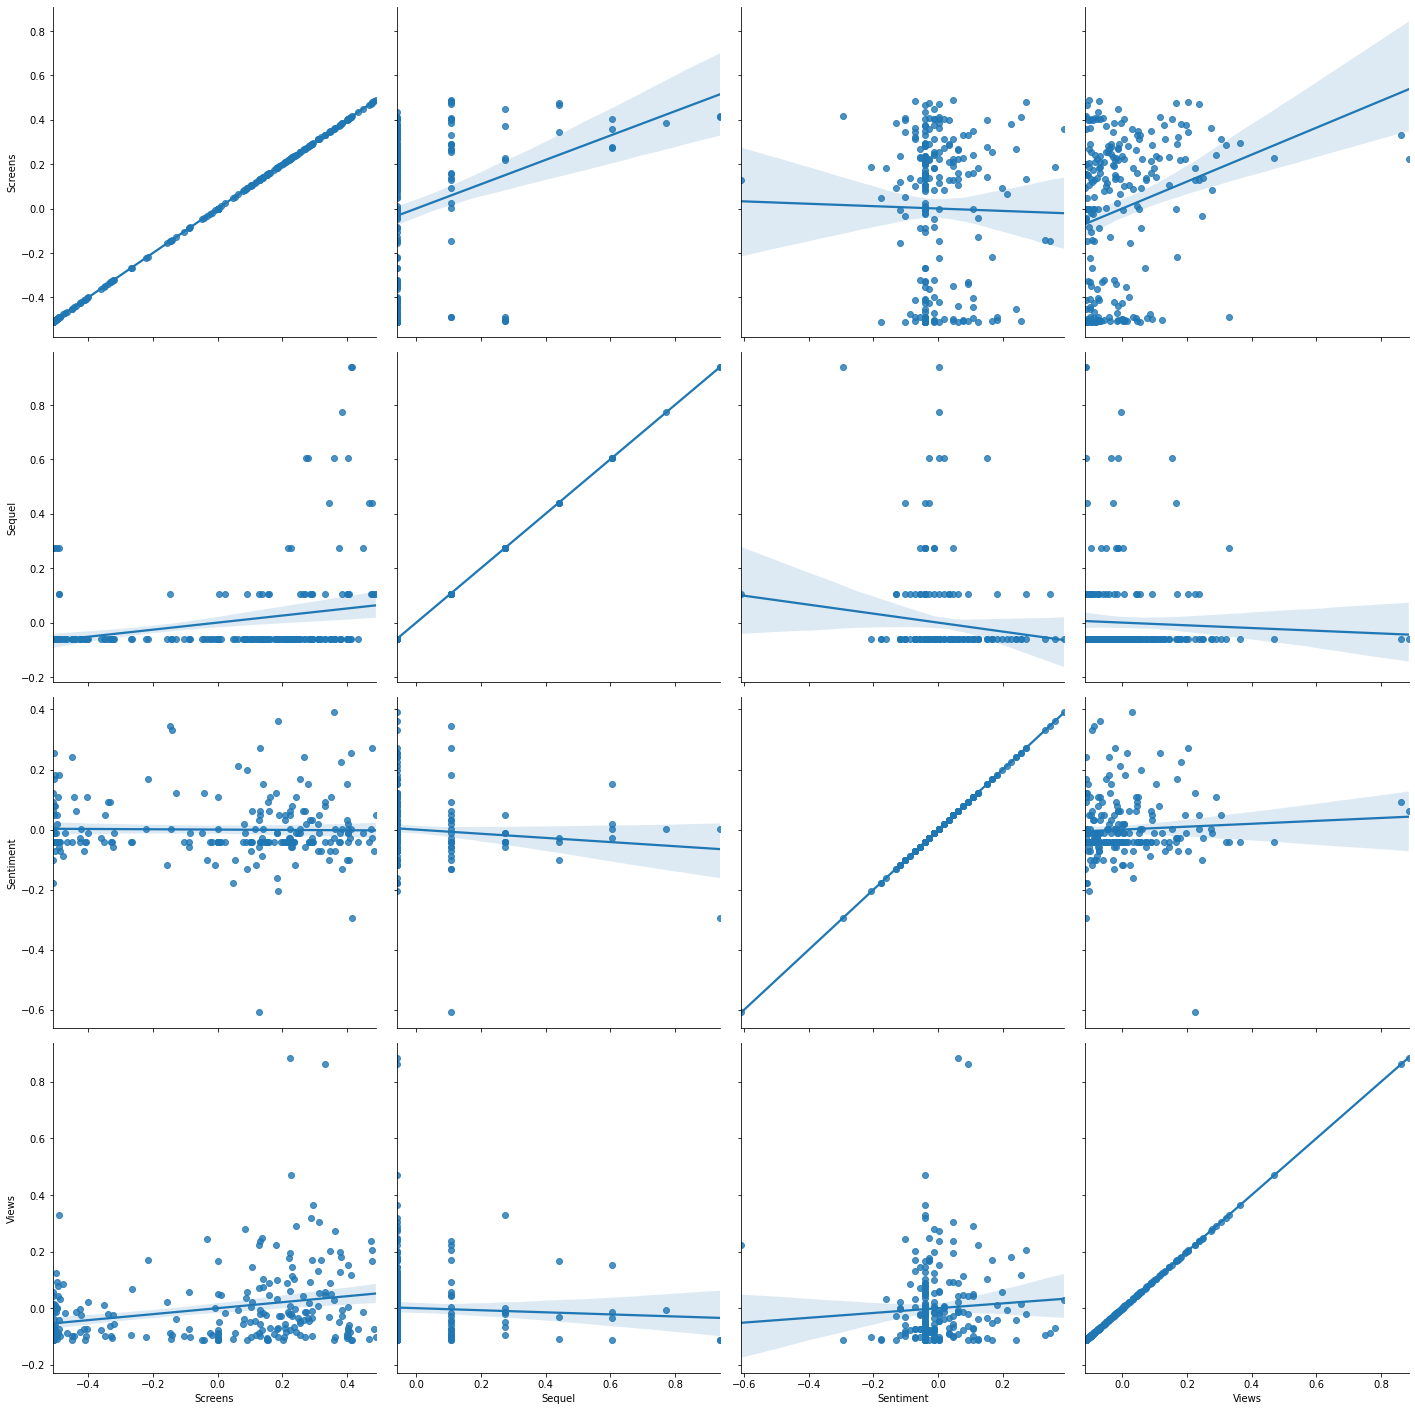

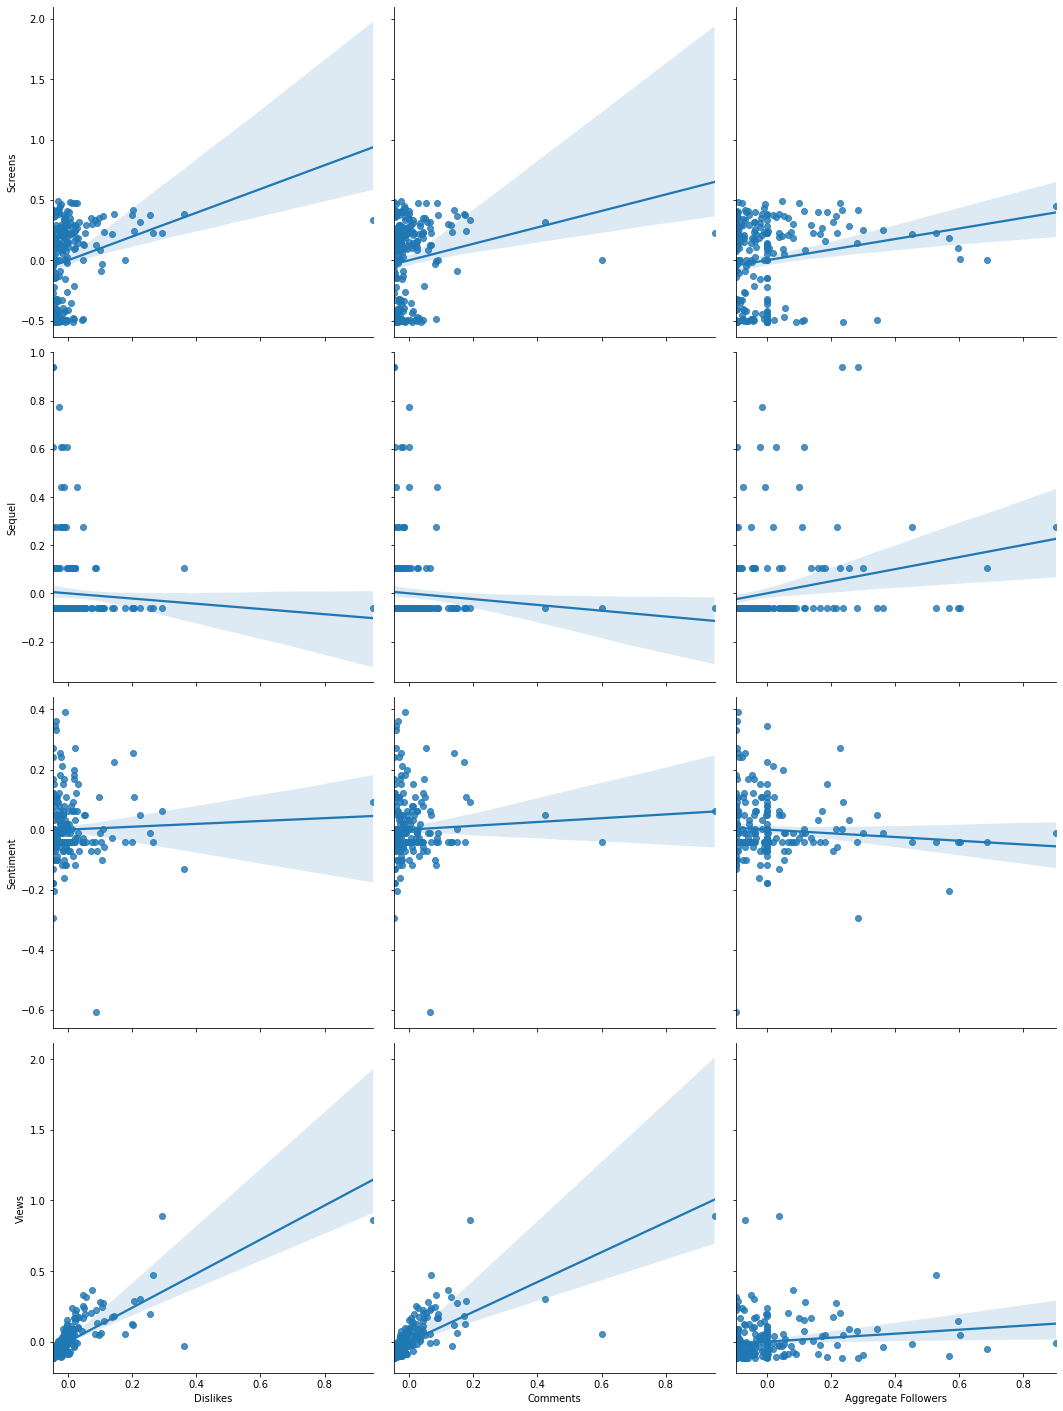

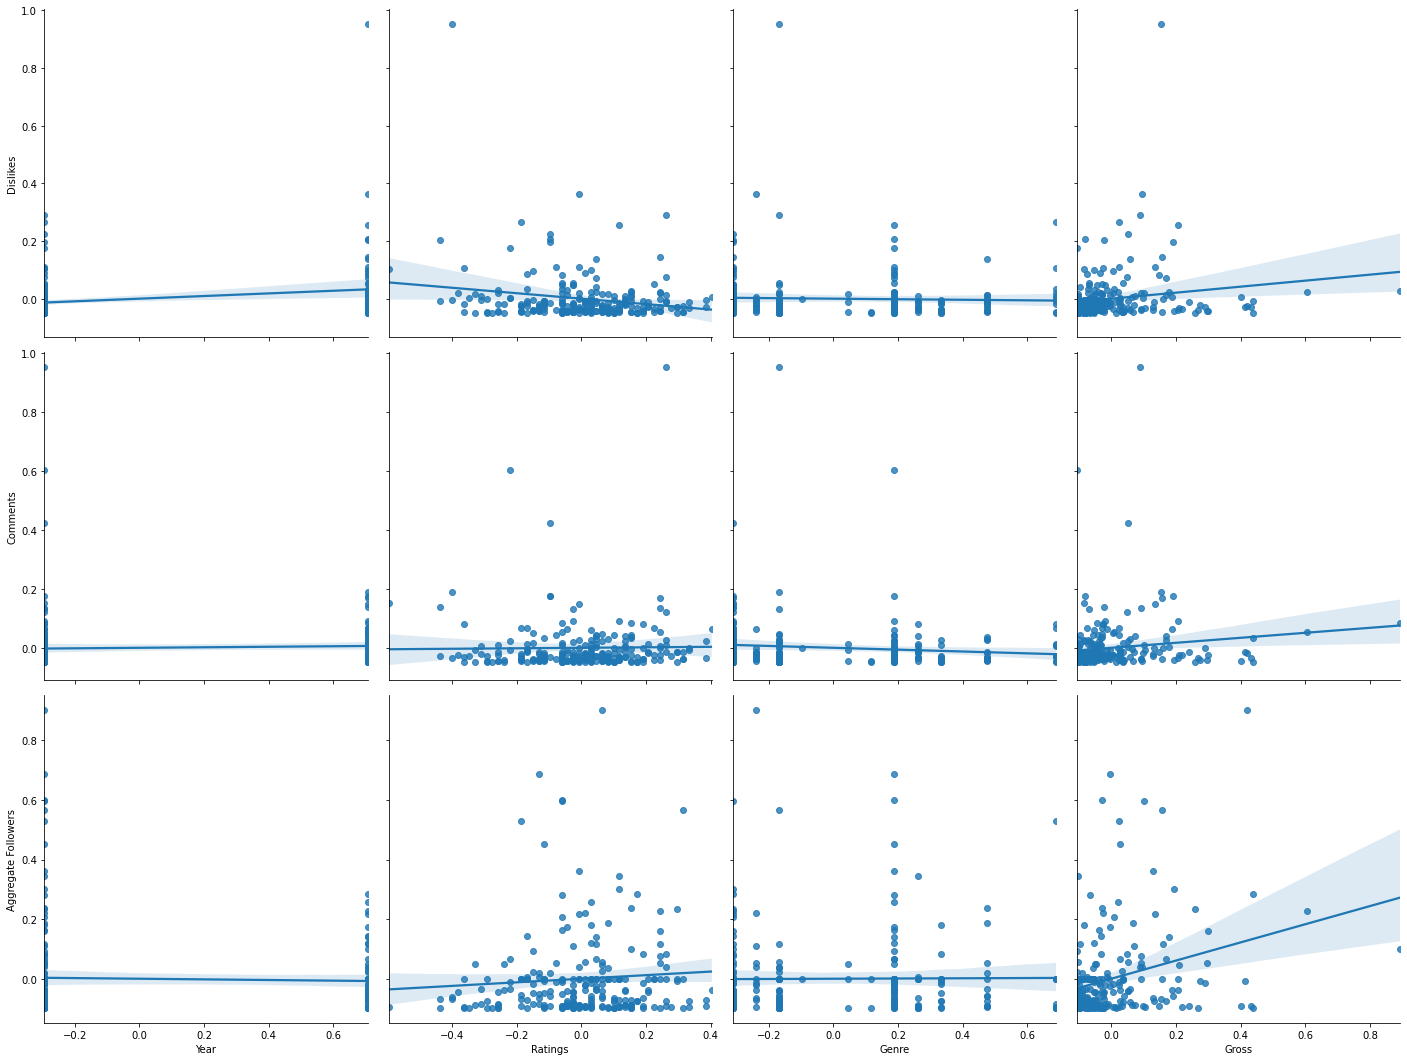

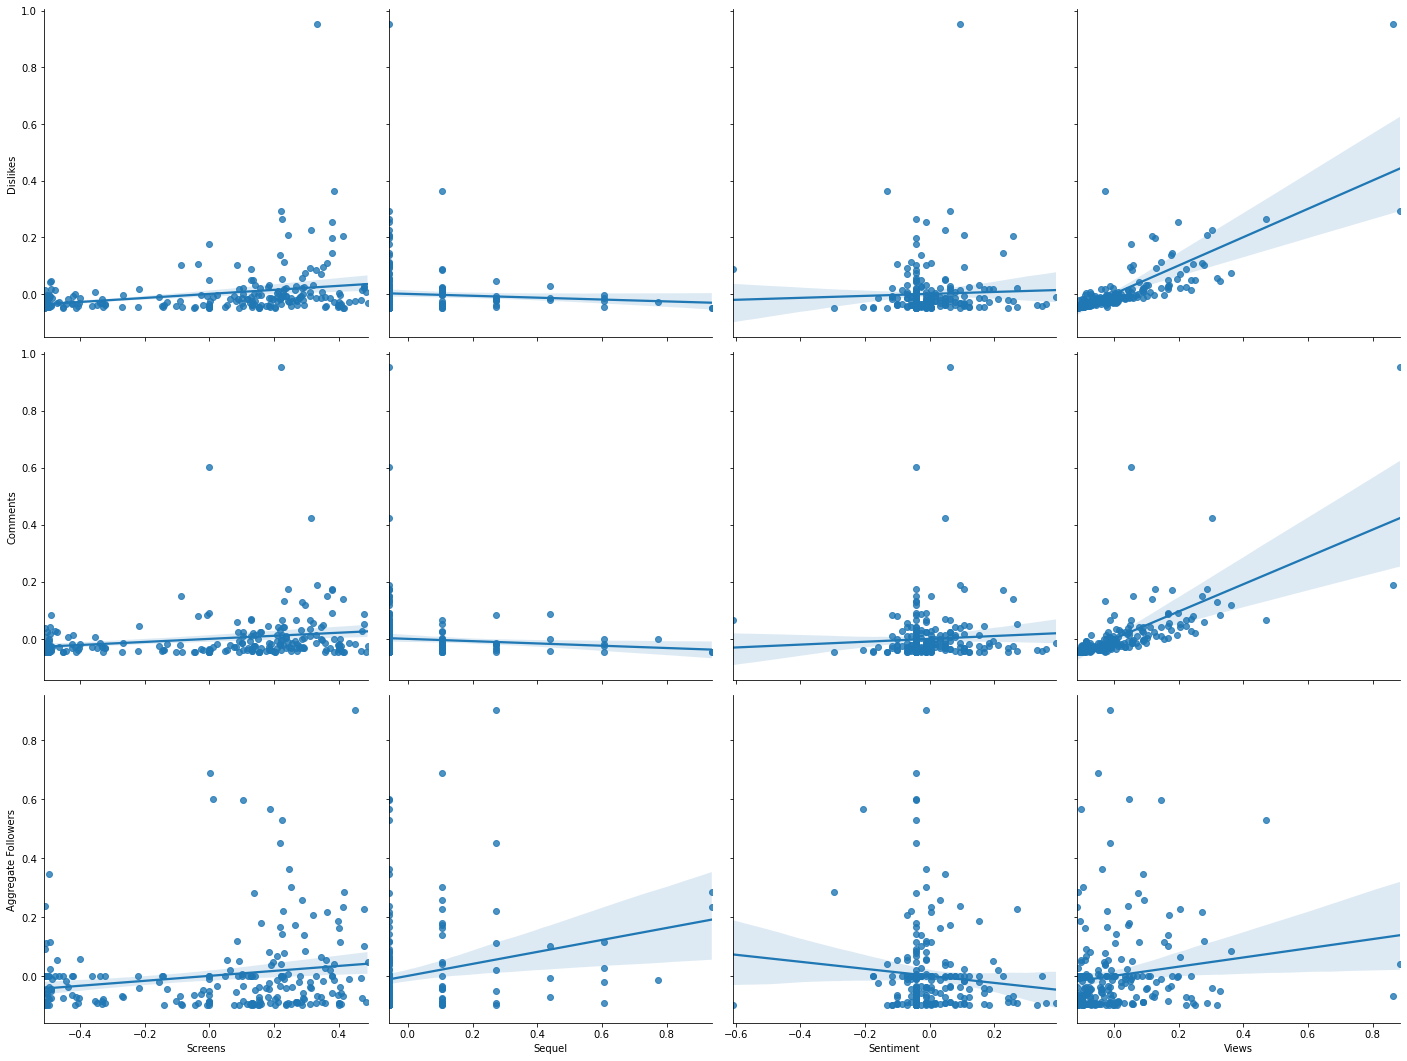

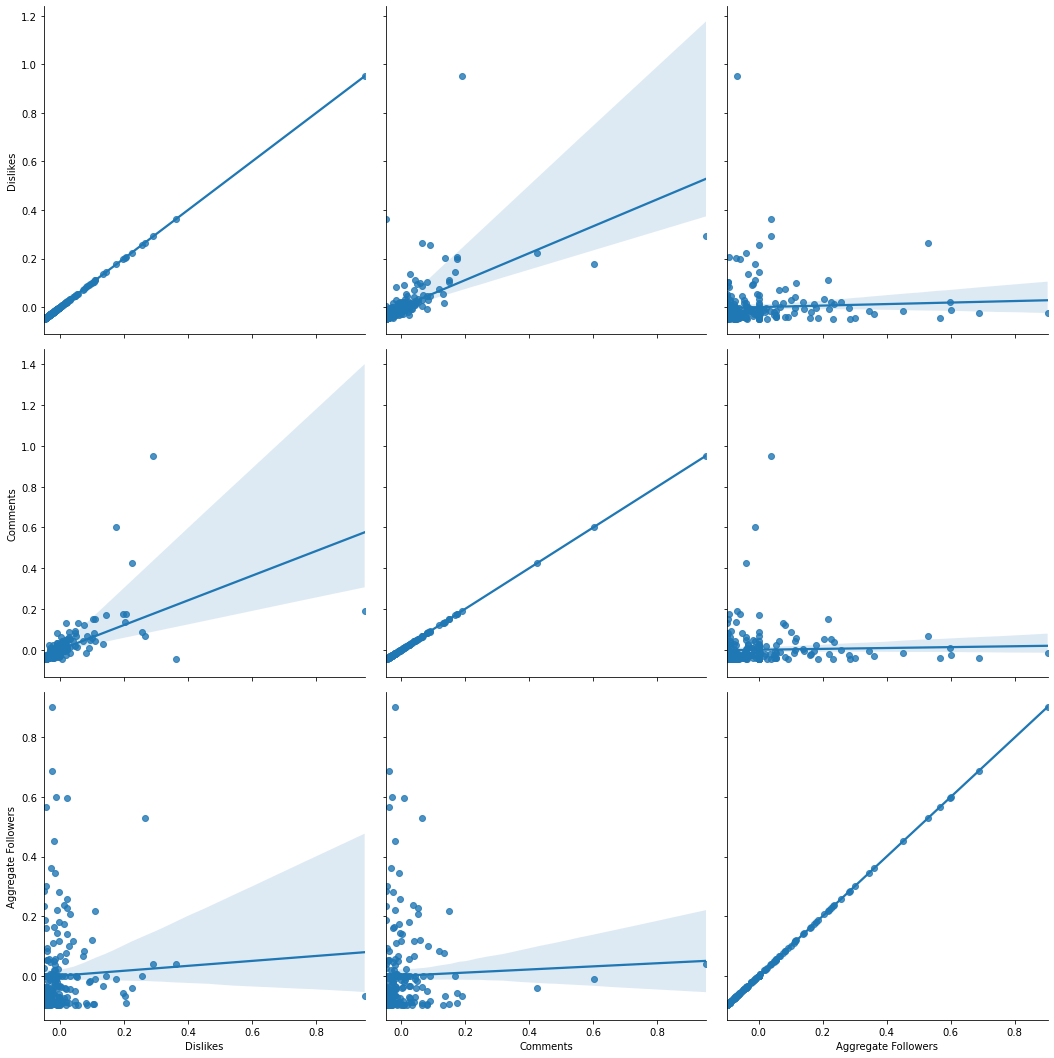

In [4]:
def Correlation(feature_x, feature_y):
    mean_feature_x = sum(feature_x)/len(feature_x)
    mean_feature_y = sum(feature_y)/len(feature_y)

    subtracted_mean_feature_x = [i - mean_feature_x for i in feature_x]
    subtracted_mean_feature_y = [i - mean_feature_y for i in feature_y]

    x_times_y = [a * b for a, b in list(zip(subtracted_mean_feature_x, subtracted_mean_feature_y))]

    feature_x_squared = [i * i for i in feature_x]
    feature_y_squared = [i * i for i in feature_y]

    return sum(x_times_y) / math.sqrt(sum(feature_x_squared) * sum(feature_y_squared))

def GenerateCorrelationMatrix():
    size = data.shape[1]-1
    Result = []
    for i in range(size):
        Result.append([])
        for j in range(size):
            Result[i].append(round(Correlation(list(data.iloc[:,i+1]),list(data.iloc[:,j+1])),4))
            
    return Result


def PrintCorrelationMatrix(Features): 
    plt.rcParams["figure.figsize"] = (14,7)
    ax = sn.heatmap(GenerateCorrelationMatrix(),xticklabels=Features, yticklabels=Features, annot=True)
    plt.title("Correlation Matrix",fontsize=12)
    plt.show()
    
    Labels = [(0,4),(5,9),(10,13)]
    for i,j in Labels :
        for k,z in Labels:
            g = sn.PairGrid(data, y_vars=all_features[i:j], x_vars=all_features[k:z], height=5)
            print(g.map(sn.regplot))

PrintCorrelationMatrix(all_features)



In [5]:
# تابع فرض ما
def Hypothesis(X, Theta):
    result = 0
    for index in range(len(X)):
        result += X[index]*Theta[index]
    return result


In [6]:
# تابع محاسبه خطای MSE
def Loss(X,Y,Theta):
    mse_error = 0
    for i in range(len(X)) :
        predict = Hypothesis(X[i],Theta) # محاسبه مقدار پیش بینی شده
        mse_error += (predict - Y[i])**2 # محاسبه MSE
    mse_error /= len(X)
    
    return mse_error

# تابع گرادیان نزولی برا یافتن مقادیر وزن های هر یک از ویژگی ها
def GradientDescent(x_train,y_train,x_test,y_test,Degree,Iteration,LearningRate=0.1):
    
    Thetas = [0]*Degree 
    ThetasHistory = [] 
    TrainErrorHistory = [] 
    TestErrorHistory = [] 
    LearningRateHistory = [] 
    TotalErrorHistory = [] 

    for ite in range(Iteration):
        Gradients = [0]*Degree 
        
        
        for deg in range(Degree) : 
            for index in range(len(x_train)): 
                Gradients[deg] += (Hypothesis(x_train[index],Thetas) - y_train[index])*(x_train[index][deg])
                
            Gradients[deg] /= len(x_train)
            Thetas[deg] = Thetas[deg] - (LearningRate*Gradients[deg]) 
        
        
        if ite%21 == 20 :
            LearningRate = LearningRate*0.9
             
        
        TrainErrorHistory.append(Loss(x_train,y_train,Thetas))
        TestErrorHistory.append(Loss(x_test,y_test,Thetas))
        TotalErrorHistory.append(Loss(x_test+x_train,y_test+y_train,Thetas))
        ThetasHistory.append(Thetas)
        LearningRateHistory.append(LearningRate)
        
    return [Thetas,ThetasHistory,TrainErrorHistory,TestErrorHistory,LearningRateHistory,TotalErrorHistory]
            

In [7]:
y_total = list(data["Ratings"])

data.drop("Ratings", inplace=True, axis=1)  
data.drop("Movie", inplace=True, axis=1) 


Shape:  (231, 12)


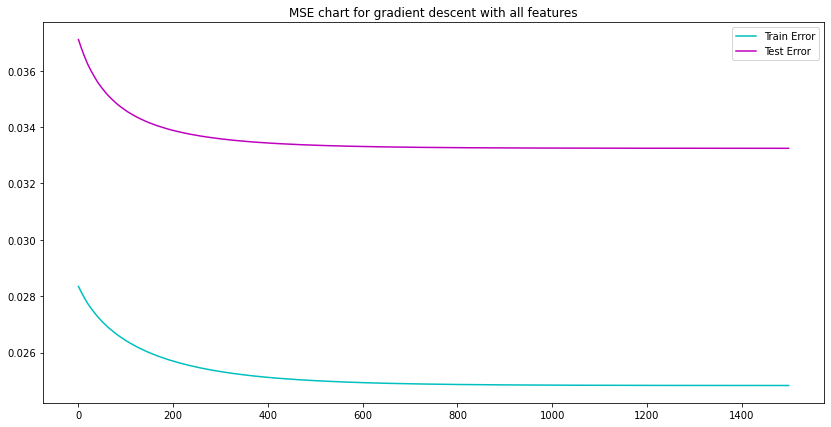

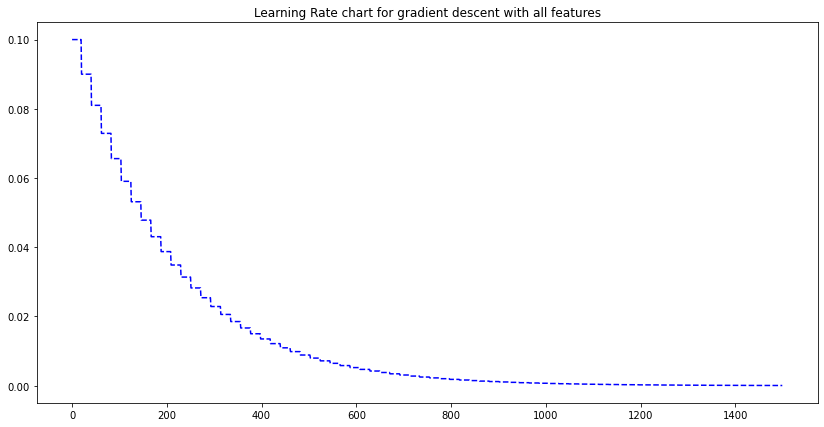

In [8]:
plt.rcParams["figure.figsize"] = (14,7)

def GradientDescentWithAllFeatures():
    x_total = data.values
    print("Shape: ",data.shape)

    x_train, x_test, y_train, y_test = map(list,train_test_split(x_total, y_total, test_size=0.3,shuffle=False))
    
    GD = GradientDescent(x_train,y_train,x_test,y_test,len(x_train[0]),1500)

    plt.plot(range(len(GD[2])),GD[2],'c-',label="Train Error")
    plt.plot(range(len(GD[3])),GD[3],'m-',label="Test Error")
    plt.title("MSE chart for gradient descent with all features")
    plt.legend()
    plt.show()
    
    plt.plot(range(len(GD[4])),GD[4],'b--')
    plt.title("Learning Rate chart for gradient descent with all features")
    plt.show()
    return GD

GD = GradientDescentWithAllFeatures()


In [9]:
data.drop("Comments", inplace=True, axis=1)
data.drop("Dislikes", inplace=True, axis=1) 
data.drop("Year", inplace=True, axis=1) 


Shape:  (231, 9)


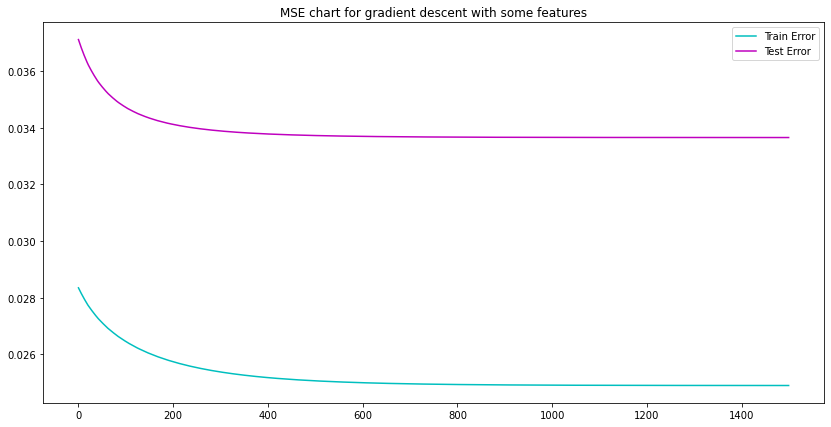

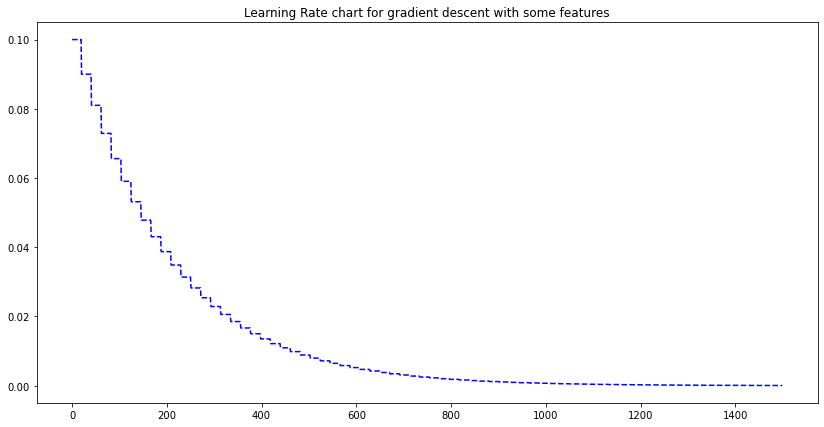

In [10]:
def GradientDescentWithSomeFeatures():
    
    x_total = data.values
    print("Shape: ",data.shape)

    x_train, x_test, y_train, y_test = map(list,train_test_split(x_total, y_total, test_size=0.3,shuffle=False))
    
    GD = GradientDescent(x_train,y_train,x_test,y_test,len(x_train[0]),1500)
    
    plt.plot(range(len(GD[2])),GD[2],'c-',label="Train Error")
    plt.plot(range(len(GD[3])),GD[3],'m-',label="Test Error")
    plt.title("MSE chart for gradient descent with some features")
    plt.legend()
    plt.show()
    
    plt.plot(range(len(GD[4])),GD[4],'b--')
    plt.title("Learning Rate chart for gradient descent with some features")
    plt.show()
    return GD

GD_selected_feature = GradientDescentWithSomeFeatures()

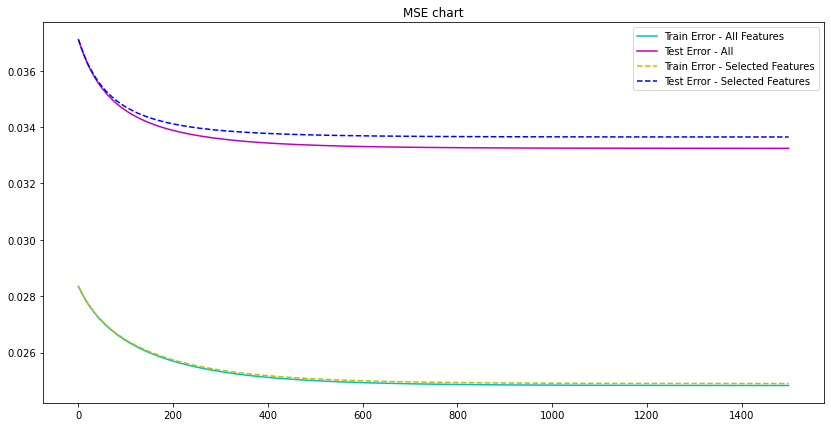

In [11]:
plt.plot(range(len(GD[2])),GD[2],'c-',label="Train Error - All Features")
plt.plot(range(len(GD[3])),GD[3],'m-',label="Test Error - All")
plt.plot(range(len(GD_selected_feature[2])),GD_selected_feature[2],'y--',label="Train Error - Selected Features")
plt.plot(range(len(GD_selected_feature[3])),GD_selected_feature[3],'b--',label="Test Error - Selected Features")
plt.title("MSE chart")
plt.legend()
plt.show()